Going through the official tutorial. This is mainly a summary of that
- https://matplotlib.org/3.1.1/tutorials/index.html#

# General Concepts

- Plotting requires action on a range of levels, from the most general (e.g., 'contour this 2-D array') to the most specific (e.g., 'color this screen pixel red'). 
- The purpose of a plotting package is to assist you in visualizing your data as easily as possible, with all the necessary control -- that is, by using relatively high-level commands most of the time, and still have the ability to use the low-level commands when needed.
- Everything in matplotlib is organized in a hierarchy. 
- - At the top of the hierarchy is the matplotlib "state-machine environment" which is provided by the matplotlib.pyplot module. 
- - At this level, simple functions are used to add plot elements (lines, images, text, etc.) to the current axes in the current figure.

- The next level down in the hierarchy is the first level of the object-oriented interface
- - pyplot is used only for a few functions such as figure creation
- - the user explicitly creates and keeps track of the figure and axes objects. 
- At this level, the user uses pyplot to create figures, and through those figures, one or more axes objects can be created. These axes objects are then used for most plotting actions.

- For even more control -- which is essential for things like embedding matplotlib plots in GUI applications -- the pyplot level may be dropped completely, leaving a purely object-oriented approach.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

For a picture of Figure, Axes, Axis, and more see https://matplotlib.org/3.1.1/_images/anatomy.png

# Figure

The basic plot
keeps track of:
- all the child Axes
- a smattering of 'special' artists (titles, figure legends, etc)
- the canvas

A figure can have any number of Axes, but to be useful should have at least one
Create a basic Figure:

<Figure size 432x288 with 0 Axes>

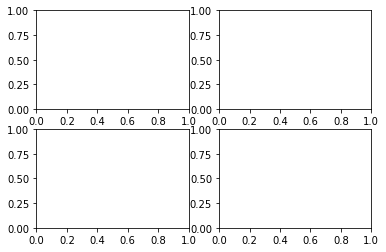

In [3]:
fig = plt.figure()  # an empty figure with no axes
fig.suptitle('No axes on this figure')  # Add a title so we know which it is
fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

# Axes (basically the plot)
The Axes class and its member functions are the primary entry point to working with the OO interface.
- the region of the image with the data space. 
- A given figure can contain many Axes, but a given Axes object can only be in one Figure. 
- The Axes contains two (or three in the case of 3D) Axis objects which take care of the data limits (the data limits can also be controlled via set via the set_xlim() and set_ylim() Axes methods). 
- Each Axes has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

# Axis - the number-line-like objects

- They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks
- The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter.
- The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

# Artist

- everything you can see on the figure is an artist (even the Figure, Axes, and Axis objects).
- This includes Text objects, Line2D objects, collection objects, Patch objects, etc.
- When the figure is rendered, all of the artists are drawn to the canvas. - Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.


# Putting it all together
The following does this:
- the first call to plt.plot creates the axes
- subsequent calls to plt.plot add additional lines on the same axes
- plt.xlabel, plt.ylabel, plt.title and plt.legend set the axes labels and title and add a legend.
- plt.show displays it

Note on numpy linspace
Format : numpy.linspace(start, stop, num=50)
1. start - The starting value from where the numeric sequence has to be started.
2. stop: - The last value of the numeric sequence.
3. num (non-negative integer): - The number of numbers or samples to be generated. If you do not mention anything for this parameter then the function uses a default value of 50.

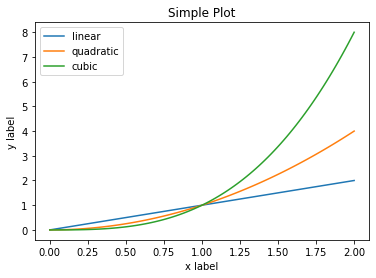

In [6]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()
plt.show()

# Simple plot function

In [7]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

Call the function

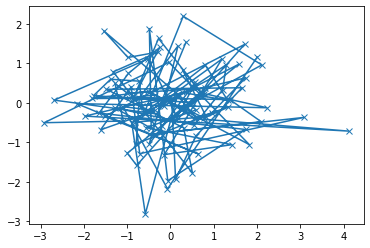

In [8]:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})

Call it again with 2 sub-plots

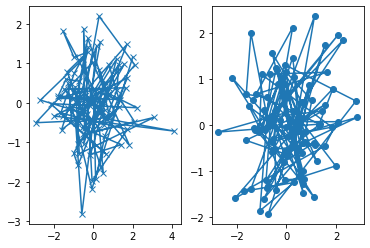

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

In [10]:
help(np.random.randn)

Help on built-in function randn:

randn(...) method of numpy.random.mtrand.RandomState instance
    randn(d0, d1, ..., dn)
    
    Return a sample (or samples) from the "standard normal" distribution.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `standard_normal`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    .. note::
        New code should use the ``standard_normal`` method of a ``default_rng()``
        instance instead; see `random-quick-start`.
    
    If positive int_like arguments are provided, `randn` generates an array
    of shape ``(d0, d1, ..., dn)``, filled
    with random floats sampled from a univariate "normal" (Gaussian)
    distribution of mean 0 and variance 1. A single float randomly sampled
    from the distribution is returned if no argument is provided.
    
    Paramete